# Machine Learning on PGA Tour - Statistical Data Exploration

In this notebook we will try to get an overview of the data using visualization and statistical methods before we proceed to the machine learning models.

In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("../data/pga_data.csv")
df

,Name,Ranking,Driving Distance,Driving Accuracy,Club Head Speed,Ball Speed,Eligible
0,Patrick Cantlay,1,302.8,60.71,116.22,174.71,1.0
1,Jon Rahm,2,309.0,63.73,118.72,178.46,1.0
2,Kevin Na,3,288.5,66.56,112.40,165.02,1.0
3,Justin Thomas,4,303.9,55.72,117.01,176.18,1.0
4,Viktor Hovland,5,302.2,63.86,116.64,173.98,1.0
...,...,...,...,...,...,...,...
120,C.T. Pan,121,296.3,61.11,111.25,167.40,-1.0
121,Matt Kuchar,122,287.8,66.09,108.59,162.19,-1.0
122,Brice Garnett,123,288.1,70.72,109.55,164.76,-1.0
123,Scott Stallings,124,297.4,59.26,115.95,173.80,-1.0


Let's first look at the differences of the features between the two classes.

In [58]:
df["Driving Distance"][0:30].mean(), df["Driving Distance"][30:].mean()

(303.05333333333334, 297.4094736842105)

In [59]:
df["Driving Accuracy"][0:30].mean(), df["Driving Accuracy"][30:].mean()

(61.656666666666666, 61.461894736842105)

In [60]:
df["Club Head Speed"][0:30].mean(), df["Club Head Speed"][30:].mean()

(117.14233333333333, 115.02399999999999)

In [61]:
df["Ball Speed"][0:30].mean(), df["Ball Speed"][30:].mean()

(174.62800000000004, 171.36105263157893)

Kernel Density Estimations:

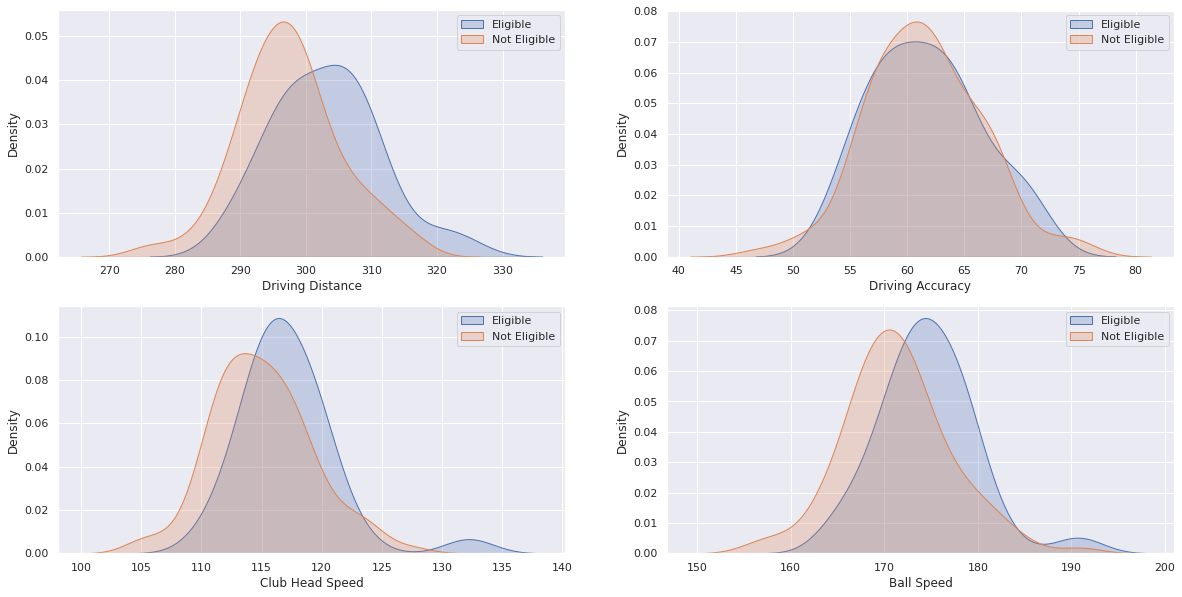

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
i = 0
j = 0
for label in ["Driving Distance", "Driving Accuracy", "Club Head Speed", "Ball Speed"]:
    sns.kdeplot(df[label][:30], ax=axes[i, j], shade=True, label="Eligible")
    sns.kdeplot(df[label][30:], ax=axes[i, j], shade=True, label="Not Eligible")
    axes[i, j].legend()
    if i == j:
        j += 1
    elif j > i:
        j -= 1
        i += 1
    else:
        j += 1

Linear Dependencies of the Features:

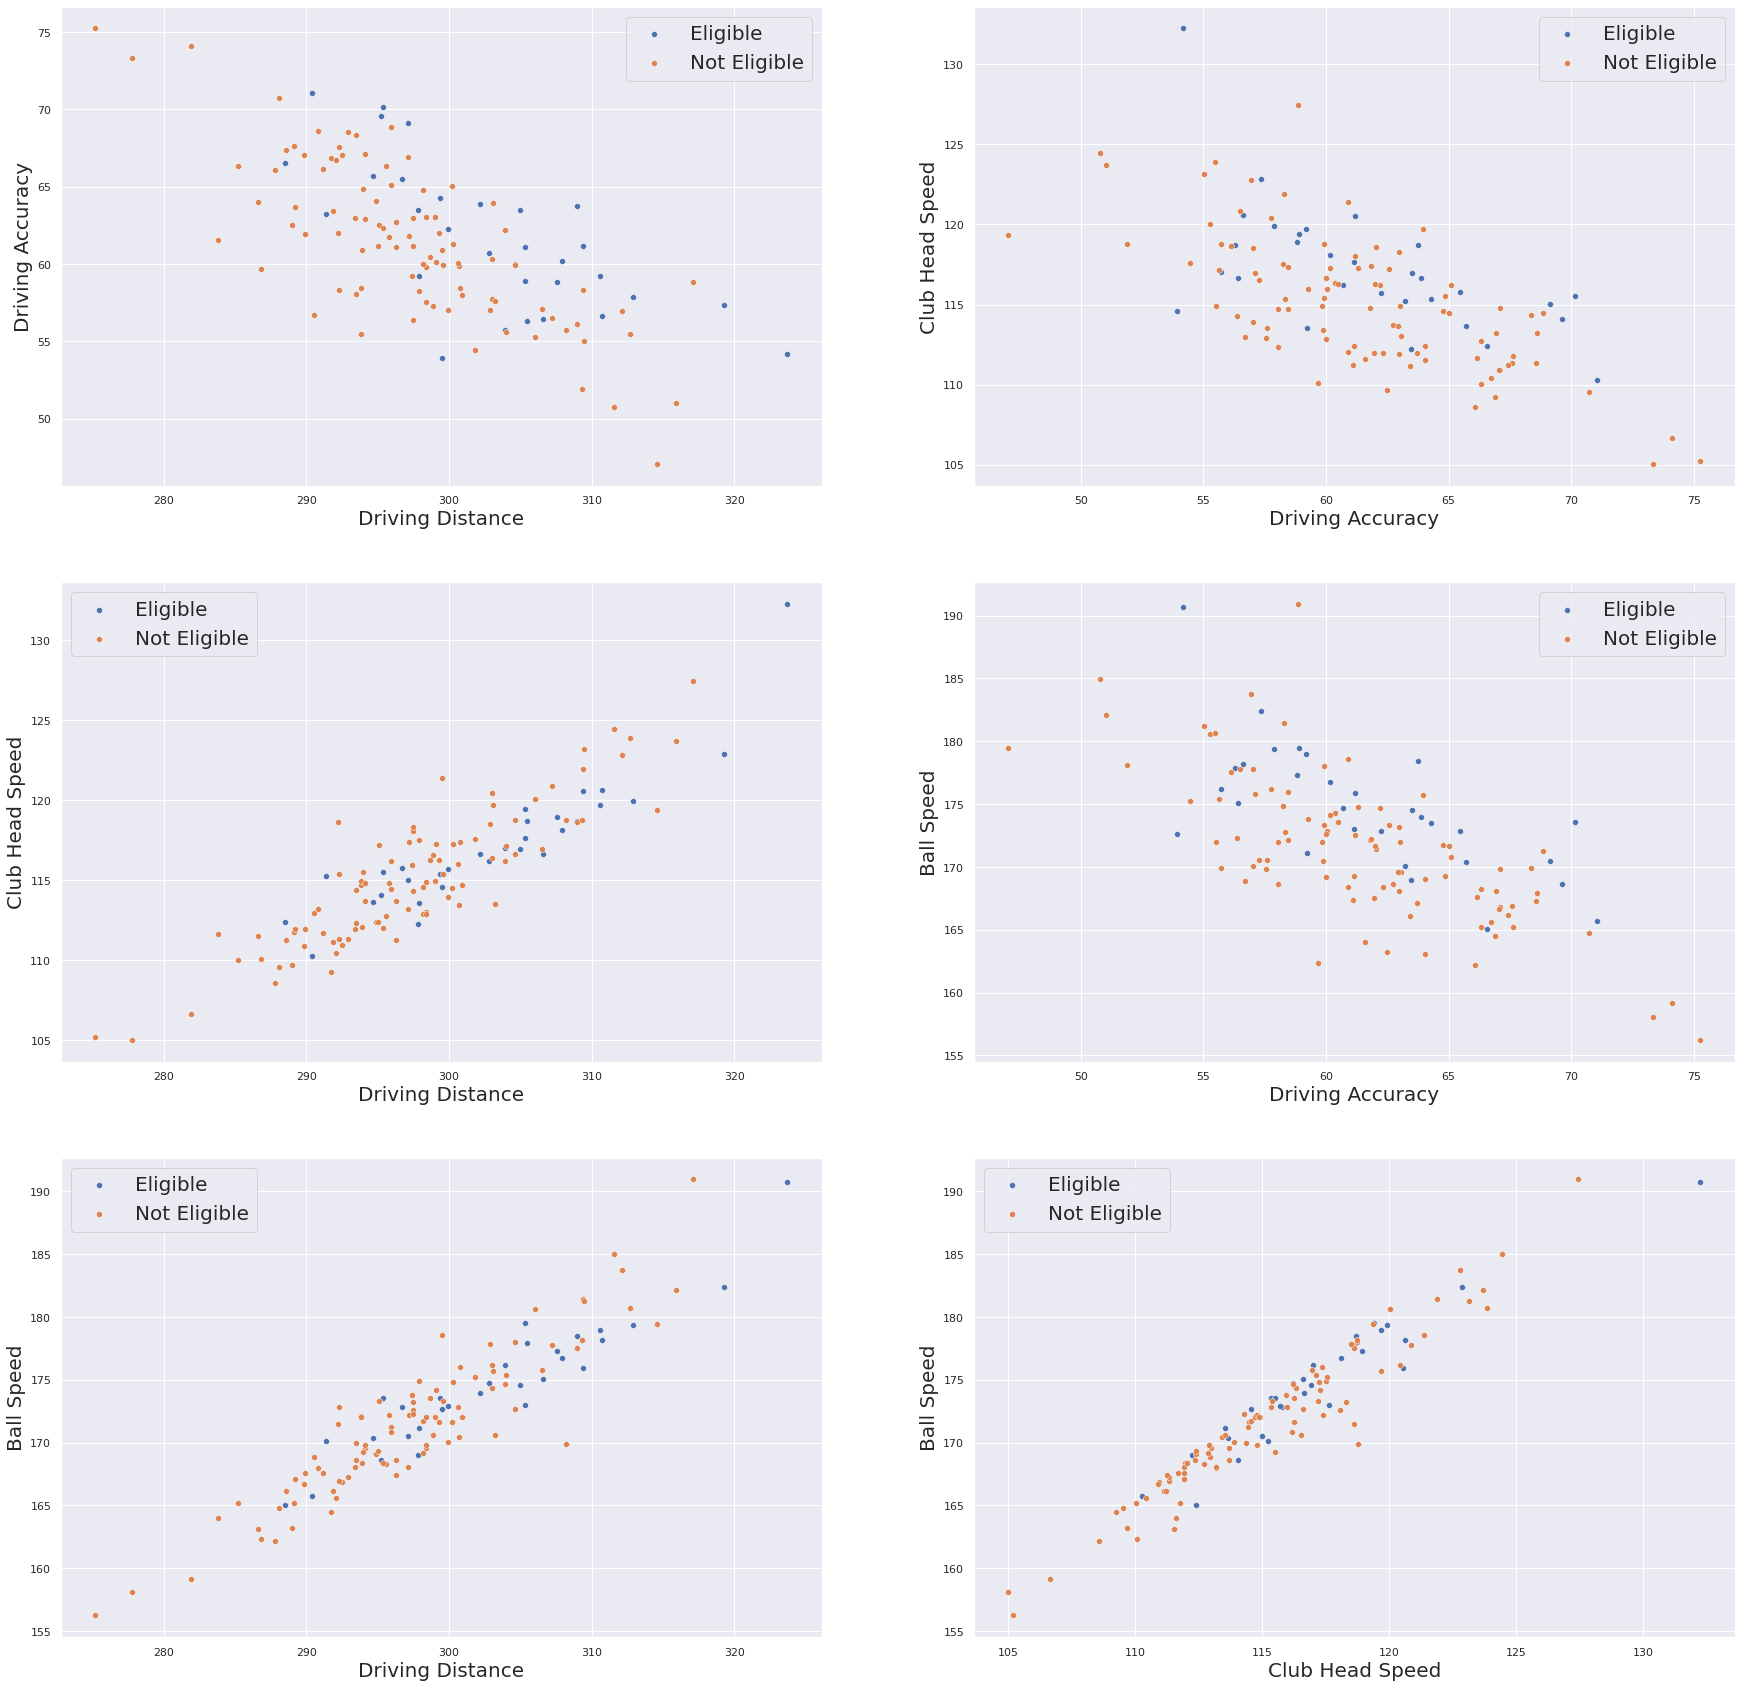

In [55]:
import itertools

columns = df.columns[2:6]
i = 0
j = 0

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))
plt.rcParams['axes.labelsize'] = 14

for pair in itertools.combinations(columns, 2):
    sns.scatterplot(x=df[pair[0]][:30], y=df[pair[1]][:30], ax=axes[i, j], label="Eligible")
    sns.scatterplot(x=df[pair[0]][30:], y=df[pair[1]][30:], ax=axes[i, j], label="Not Eligible")
    axes[i, j].legend(prop={'size': 20})
    if i == 2:
        j += 1
        i = 0
    else:
        i += 1

    

There seems to be a lot of multicollinearity between the features. However, as we are not interested in individual feature parameter estimates, this shouldn't be a problem.